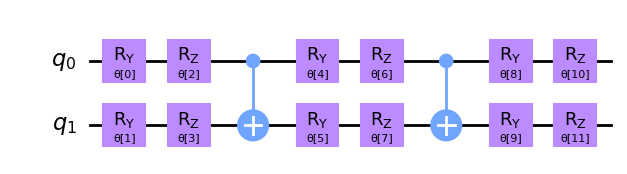

In [1]:
from qiskit.circuit.library import TwoLocal

# Ansatz
ansatz = TwoLocal(
    num_qubits=2,
    rotation_blocks=["ry", "rz"],
    entanglement_blocks="cx",
    entanglement="linear",
    reps=2
)

ansatz.decompose().draw('mpl', style='clifford')

In [2]:
from qiskit.quantum_info import SparsePauliOp
import numpy as np

# hamiltonian(observable)
observable = SparsePauliOp.from_list([("II", 2), ("XX", -3), ("YY", 2), ("ZZ", -4)])


eigenvalues, eigenvectors = np.linalg.eigh(observable.to_matrix())
print(eigenvalues)
print(min(eigenvalues))
# energy expectation value
# np.linalg.eigvals(observable.to_matrix()).real    

[-7.  3.  5.  7.]
-7.0


In [3]:
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import EstimatorV2 as Estimator

from vqe_v2 import VariationalQuantumEigensolverV2 as VQE
from fadam_optimizer import FAdam
from finite_estimator_gradient_v2 import FiniteDiffEstimatorGradientV2
# simulator
backend = AerSimulator()

# 4. FAdamOptimizer
fadam_optimizer = FAdam(lr=0.01, betas=(0.9, 0.999), eps=1e-8, maxiter=200)

estimator = Estimator(mode=backend)
gradient = FiniteDiffEstimatorGradientV2(estimator, epsilon=0.01)

d:\miniconda3\envs\qiskit13\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [4]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_ansatz = pm.run(ansatz)
isa_observable = observable.apply_layout(layout = isa_ansatz.layout)

In [6]:
# 5. VQE with FAdamOptimizer
vqe = VQE(
    estimator=estimator,
    ansatz=isa_ansatz,
    optimizer=fadam_optimizer, # FAdamOptimizer
    initial_point=np.zeros(ansatz.num_parameters),
    gradient=gradient,  # 
    #callback=
)

# VQE 실행
result = vqe.compute_minimum_eigenvalue(operator=isa_observable)
print(f"VQE mimimum energy (FAdam): {result.eigenvalue.real}")
print(f"optimized parameters (FAdam): {result.optimal_parameters}")

VQE 최저 에너지 (FAdam): -6.7626953125
최적 매개변수 (FAdam): {ParameterVectorElement(θ[0]): np.float32(-0.076478206), ParameterVectorElement(θ[1]): np.float32(0.0077056433), ParameterVectorElement(θ[2]): np.float32(0.20063852), ParameterVectorElement(θ[3]): np.float32(0.23816808), ParameterVectorElement(θ[4]): np.float32(1.2629455), ParameterVectorElement(θ[5]): np.float32(0.00022753439), ParameterVectorElement(θ[6]): np.float32(-0.054955583), ParameterVectorElement(θ[7]): np.float32(-0.1650095), ParameterVectorElement(θ[8]): np.float32(0.015573704), ParameterVectorElement(θ[9]): np.float32(-0.06008977), ParameterVectorElement(θ[10]): np.float32(0.07098418), ParameterVectorElement(θ[11]): np.float32(-0.00827905)}
